In [1]:
import numpy as np
from sktime.utils.plotting import plot_series
from sktime.datasets import load_airline
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

In [2]:
y = load_airline()
y_train, y_test = temporal_train_test_split(y, test_size=36)
# we will try to forecast y_test from y_train

In [3]:
fh = np.arange(1, y_test.shape[0] + 1)

In [4]:
fh

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36])

In [5]:
forecaster = NaiveForecaster(strategy="last", sp=12)

forecaster.fit(y_train)

# y_pred will contain the predictions
y_pred = forecaster.predict(fh)

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

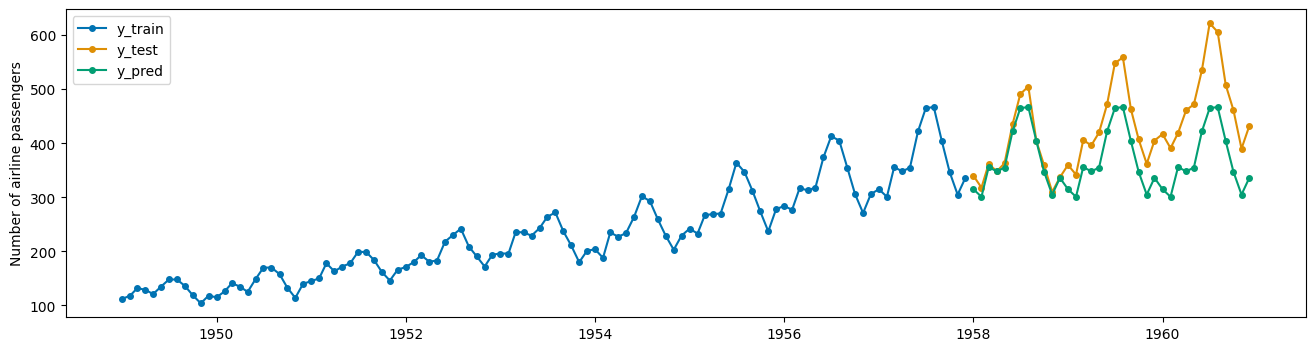

In [6]:
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

In [7]:
# @NOTE: The FIRST argument is the ground truth, the SECOND argument are the forecasts the order matters for most metrics in general
mean_absolute_percentage_error(y_test, y_pred, symmetric=False)

np.float64(0.13189432350948402)